In [27]:
import re
import nltk
import unidecode
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
from word2number import w2n
from textblob import Word
import pandas as pd
import numpy as np
import dask.dataframe as dd

# Additional setup for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

# Define stopwords and words
stop = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [28]:
# # Read the CSV file and load it as a dataframe 
# df_reviews = pd.read_csv('IMDB Dataset.csv')

# df_reviews.head()

In [29]:
# df_reviews.shape

### DATA PREPROCESSING¶
In this section we have done some text preprocessing operation to transform and clean the text of the reviews.


In [30]:
# # Lambda functions for text cleaning
# remove_links = lambda text: re.sub(r'http\S+', '', text)
# remove_accents = lambda text: unidecode.unidecode(text)
# reduce_repeated_chars = lambda text: re.sub(r'([A-Za-z])\1{2,}|([.,/#!$%^&*?;:{}=_`~()+-])\2+', r'\1\2', text)
# expand_contractions = lambda text: ' '.join([contractions.fix(word) for word in text.split()])
# remove_special_chars = lambda text: re.sub(r'[^a-zA-Z\s]', '', text)
# stemming_stopwords_meaningful = lambda text: ' '.join([PorterStemmer().stem(word) for word in word_tokenize(text.lower()) if word not in stop and Word(word).singularize() in words])


In [31]:
# def text_clean(text):
#     text = text.lower()
#     text = remove_links(text)
#     text = expand_contractions(text)
#     text = remove_accents(text)
#     text = remove_special_chars(text)
#     text = reduce_repeated_chars(text)
#     text_stemmed = stemming_stopwords_meaningful(text)
#     text_singularized = ' '.join([Word(word).singularize() for word in word_tokenize(text.lower()) if word not in stop and Word(word).singularize() in words])
#     return text_stemmed, text_singularized


In [32]:
# # Apply text cleaning to the DataFrame
# # df_reviews[['cleaned_review_stemming', 'cleaned_review']] = df_reviews['review'].apply(text_clean, result_type='expand')

# df_reviews['cleaned_review_stemming'], df_reviews['cleaned_review'] = zip(*df_reviews['review'].apply(text_clean))

# # Display the cleaned DataFrame
# df_reviews.head()

### Data Cleaning

In [33]:
# # missing values
# df_reviews.isnull().sum()

In [34]:
# # check for duplicate values
# df_reviews.duplicated().sum()

In [35]:
# # remove duplicates
# df_reviews = df_reviews.drop_duplicates(keep='first')
# df_reviews

In [36]:
# # check for duplicate values
# df_reviews.duplicated().sum()

In [37]:
# # Display the cleaned DataFrame
# df_reviews.head()

In [38]:
# # Save the cleaned dataset as CSV
# df_reviews.to_csv('cleaned_IMDB_Dataset.csv', index=False)

### Exploratory Data Analysis

In [39]:
# Read the CSV file and load it as a dataframe 
df_reviews = pd.read_csv('cleaned_IMDB_Dataset.csv')

df_reviews.head()

,review,sentiment,cleaned_review_stemming,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review watch episod hook right exactli fir...,one reviewer watching episode hooked right exa...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product techniqu unassum fashion ...,wonderful little production technique unassumi...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter love time money visual stun film watch ...,petter love time money visually stunning film ...


In [40]:
df_reviews.shape

(49582, 4)

In [41]:
df_reviews['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

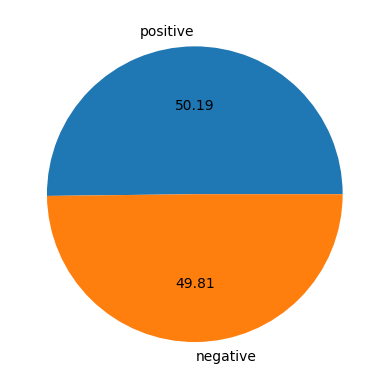

In [42]:
import matplotlib.pyplot as plt
plt.pie(df_reviews['sentiment'].value_counts(), labels=['positive','negative'],autopct="%0.2f")
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


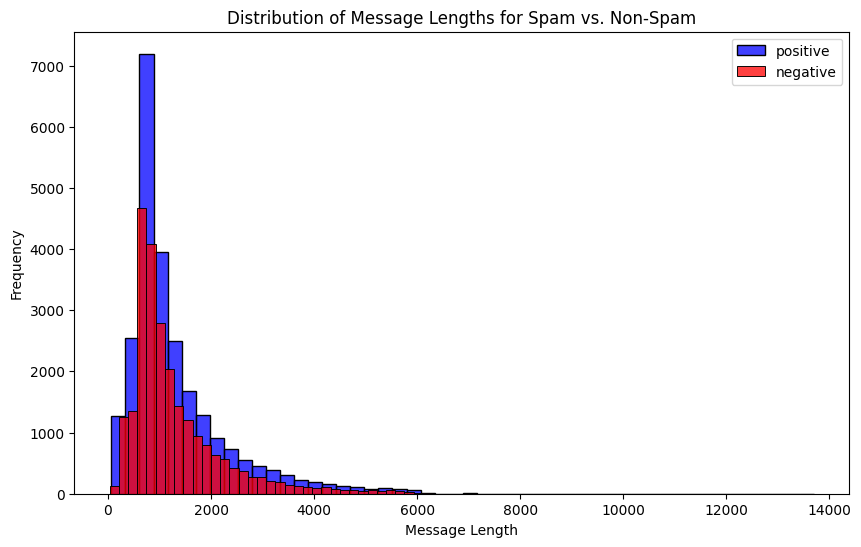

In [43]:
import seaborn as sns
#  Histogram of message lengths for spam vs. non-spam
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews[df_reviews['sentiment'] == 'positive']['review'].apply(len), bins=50, color='blue', label='positive')
sns.histplot(df_reviews[df_reviews['sentiment'] == 'negative']['review'].apply(len), bins=50, color='red', label='negative')
plt.title('Distribution of Message Lengths for Spam vs. Non-Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [44]:
class_distribution_sentiment = df_reviews['sentiment'].value_counts()
print(class_distribution_sentiment)

sentiment
positive    24884
negative    24698
Name: count, dtype: int64


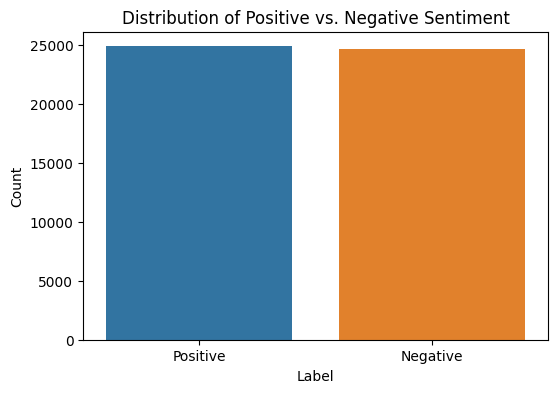

In [45]:
# Bar plot of spam vs. non-spam counts
plt.figure(figsize=(6, 4))
sns.countplot(data=df_reviews, x='sentiment')
plt.title('Distribution of Positive vs. Negative Sentiment')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Positive', 'Negative'])  
plt.show()

In [46]:
def compare_review_by_word(word,df_reviews):
    
    # Create the name for the column that will be added to the dataset
    column_name = 'contains_word_' + word 
    # Filtering reviews that contains the word "word"
    df_reviews[column_name] = df_reviews['cleaned_review'].apply(lambda x: word.lower() in x.lower()) 
    
    # Count the number of reviews that contains the word "word"
    n_reviews_with_word = df_reviews[df_reviews[column_name] == True].shape[0]
    # Count the number of reviews that are spoiler and contains the word "word"
    spoilers_with_word = df_reviews[(df_reviews['sentiment'] == 'positive') & (df_reviews[column_name] == True)].shape[0]
    # Count the number of reviews that are NOT spoiler and contains the word "word"
    not_spoilers_with_word = df_reviews[(df_reviews['sentiment'] == 'negative') & (df_reviews[column_name] == True)].shape[0]
    # Count the number of spoilers in total
    total_spoilers = df_reviews[(df_reviews['sentiment'] == 'positive')].shape[0]
    
    print("Spoiler reviews that contain the word " + word + ": " + str(spoilers_with_word))
    print("Not spoiler reviews that contain the word " + word + ": " + str(not_spoilers_with_word))
    print("Total number of spoiler reviews: " + str(total_spoilers))
    print("\n--------------------------------------------------------------- \n")
    
    # -------------------------------- #
    
    # Plot the graphs 
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15)) #ax1,ax2 refer to your two pies
    fig.tight_layout(pad = 10.0)
    
    # Graph that compare the number of reviews that are spoiler/not spoiler and contains the word "word"
    labels = ["Spoiler", "Not spoiler"]
    values = np.array([(spoilers_with_word/n_reviews_with_word)*100,(not_spoilers_with_word/n_reviews_with_word)*100 ])
    ax1.pie(values,labels = labels,colors = ['#ff6361','#ffa600'],autopct='%1.2f%%') #plot first pie
    ax1.set_title('Reviews containing the word ' + word)

    # Graph that compare the number of reviews in total that contains/not contains the word "word" 
    labels = ["Containing the word " + word, "Not containing the word " + word]
    values = np.array([(spoilers_with_word/total_spoilers)*100,((total_spoilers - spoilers_with_word)/total_spoilers)*100 ])
    ax2.pie(values,labels = labels,colors = ['#ff6361', '#77B1E0'],autopct = '%1.2f%%') #plot second pie
    ax2.set_title('Spoiler reviews')

    # Remove the column created
    df_reviews = df_reviews.drop([column_name], axis=1)
    
    return df_reviews

Spoiler reviews that contain the word spoiler: 535
Not spoiler reviews that contain the word spoiler: 830
Total number of spoiler reviews: 24884

--------------------------------------------------------------- 

Spoiler reviews that contain the word die: 3286
Not spoiler reviews that contain the word die: 3327
Total number of spoiler reviews: 24884

--------------------------------------------------------------- 

Spoiler reviews that contain the word win: 4798
Not spoiler reviews that contain the word win: 3879
Total number of spoiler reviews: 24884

--------------------------------------------------------------- 



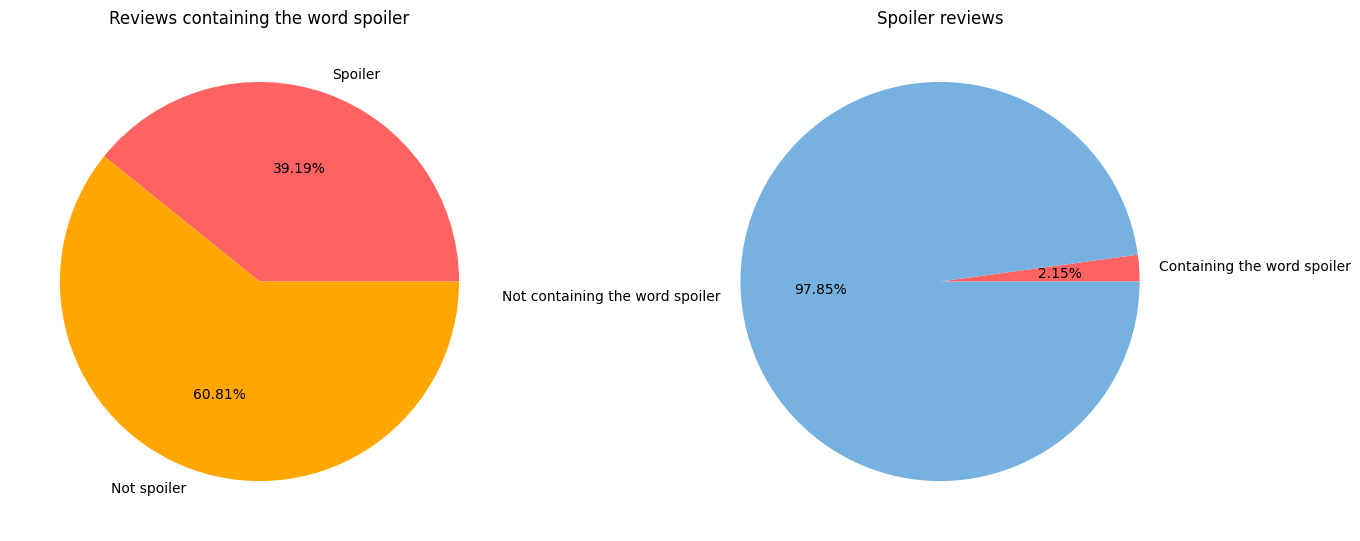

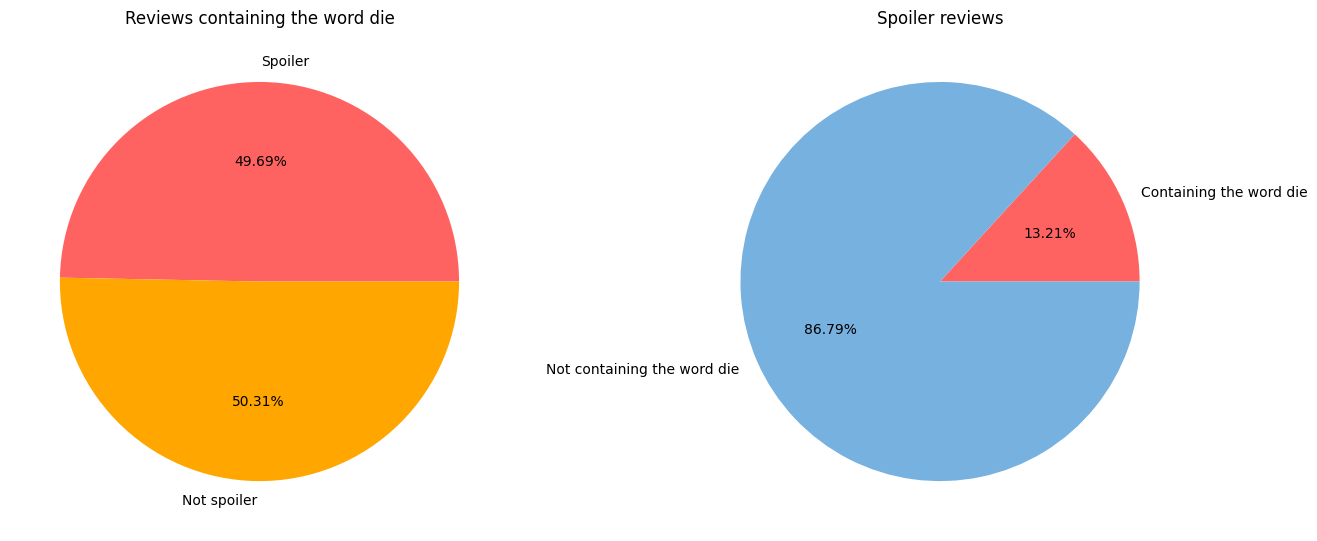

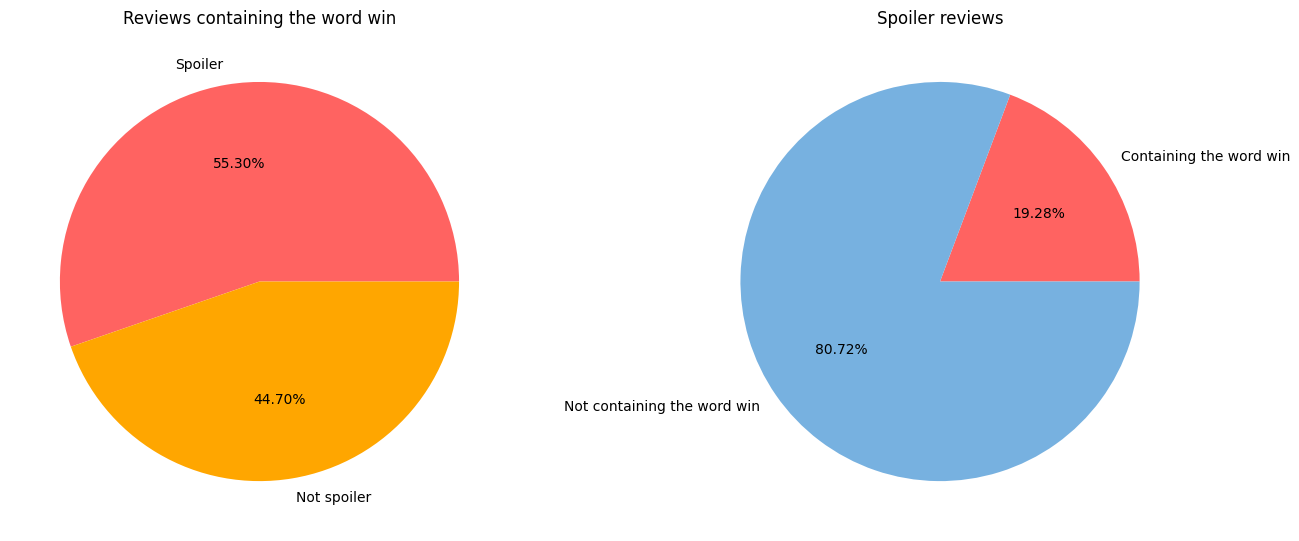

In [47]:
# Plot the pies for words "spoiler", "die" and "win".
df_reviews = compare_review_by_word('spoiler',df_reviews)
df_reviews = compare_review_by_word('die',df_reviews)
df_reviews = compare_review_by_word('win',df_reviews)

In [48]:
df_reviews.head()

,review,sentiment,cleaned_review_stemming,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review watch episod hook right exactli fir...,one reviewer watching episode hooked right exa...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product techniqu unassum fashion ...,wonderful little production technique unassumi...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter love time money visual stun film watch ...,petter love time money visually stunning film ...


In [49]:
 df_reviews['cleaned_review']

0        one reviewer watching episode hooked right exa...
1        wonderful little production technique unassumi...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter love time money visually stunning film ...
                               ...                        
49577    thought movie right good job creative original...
49578    bad plot bad dialogue bad acting idiotic annoy...
49579    catholic taught parochial elementary school nu...
49580    going disagree comment side one second rate ex...
49581    one expect star trek movie high art fan expect...
Name: cleaned_review, Length: 49582, dtype: object

In [50]:
 df_reviews['cleaned_review'].apply(len)

0        858
1        518
2        497
3        326
4        660
        ... 
49577    423
49578    284
49579    656
49580    636
49581    364
Name: cleaned_review, Length: 49582, dtype: int64

In [51]:
df_reviews['num_characters_cleaned_review'] =  df_reviews['cleaned_review'].apply(len)
df_reviews.head()

,review,sentiment,cleaned_review_stemming,cleaned_review,num_characters_cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review watch episod hook right exactli fir...,one reviewer watching episode hooked right exa...,858
1,A wonderful little production. <br /><br />The...,positive,wonder littl product techniqu unassum fashion ...,wonderful little production technique unassumi...,518
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...,497
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...,326
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter love time money visual stun film watch ...,petter love time money visually stunning film ...,660


In [52]:
 df_reviews['cleaned_review'].apply(lambda x:(nltk.word_tokenize(x)))

0        [one, reviewer, watching, episode, hooked, rig...
1        [wonderful, little, production, technique, una...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, think, ...
4        [petter, love, time, money, visually, stunning...
                               ...                        
49577    [thought, movie, right, good, job, creative, o...
49578    [bad, plot, bad, dialogue, bad, acting, idioti...
49579    [catholic, taught, parochial, elementary, scho...
49580    [going, disagree, comment, side, one, second, ...
49581    [one, expect, star, trek, movie, high, art, fa...
Name: cleaned_review, Length: 49582, dtype: object

In [53]:
 df_reviews['cleaned_review'].apply(lambda x:(nltk.word_tokenize(x)))[0]

['one',
 'reviewer',
 'watching',
 'episode',
 'hooked',
 'right',
 'exactly',
 'first',
 'thing',
 'struck',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'classic',
 'use',
 'nickname',
 'given',
 'maximum',
 'security',
 'state',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'front',
 'face',
 'inward',
 'privacy',
 'high',
 'agenda',
 'city',
 'home',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'would',
 'dare',
 'forget',
 'pretty',
 'picture',
 'painted',
 'audience',
 'forget',
 'charm',
 'forget',
 'around',
 'first',
 'episode',
 'ever',
 'saw',
 'struck',
 'nasty',
 'could',
 'say',
 'ready',
 'watched',
 'taste',
 'got',
 'accustomed',
 'high',
 'lev

In [54]:
 df_reviews['cleaned_review'].apply(lambda x:(nltk.word_tokenize(x)))[0][0]

'one'

In [55]:
# num of words
df_reviews['num_words_cleaned_review'] =  df_reviews['cleaned_review'].apply(lambda x:len(nltk.word_tokenize(x)))
df_reviews.head()

,review,sentiment,cleaned_review_stemming,cleaned_review,num_characters_cleaned_review,num_words_cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review watch episod hook right exactli fir...,one reviewer watching episode hooked right exa...,858,130
1,A wonderful little production. <br /><br />The...,positive,wonder littl product techniqu unassum fashion ...,wonderful little production technique unassumi...,518,70
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...,497,74
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...,326,51
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter love time money visual stun film watch ...,petter love time money visually stunning film ...,660,101


In [56]:
df_reviews['cleaned_review'].apply(lambda x:(nltk.sent_tokenize(x)))

0        [one reviewer watching episode hooked right ex...
1        [wonderful little production technique unassum...
2        [thought wonderful way spend time hot summer w...
3        [basically family little boy jake think zombie...
4        [petter love time money visually stunning film...
                               ...                        
49577    [thought movie right good job creative origina...
49578    [bad plot bad dialogue bad acting idiotic anno...
49579    [catholic taught parochial elementary school n...
49580    [going disagree comment side one second rate e...
49581    [one expect star trek movie high art fan expec...
Name: cleaned_review, Length: 49582, dtype: object

In [57]:
df_reviews['cleaned_review'].apply(lambda x:(nltk.sent_tokenize(x)))[0]

['one reviewer watching episode hooked right exactly first thing struck brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence classic use nickname given maximum security state mainly emerald city experimental section prison cell front face inward privacy high agenda city home scuffle death stare dodgy dealing shady agreement never far would say main appeal show due fact go show would dare forget pretty picture painted audience forget charm forget around first episode ever saw struck nasty could say ready watched taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle inmate turned prison bitch due lack street skill prison experience watching may become comfortable uncomfortable get touch side']

In [58]:
df_reviews['cleaned_review'].apply(lambda x:len(nltk.sent_tokenize(x)))[0]

1

In [59]:
df_reviews['num_sentences_cleaned_review'] = df_reviews['cleaned_review'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_reviews.head()

,review,sentiment,cleaned_review_stemming,cleaned_review,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review watch episod hook right exactli fir...,one reviewer watching episode hooked right exa...,858,130,1
1,A wonderful little production. <br /><br />The...,positive,wonder littl product techniqu unassum fashion ...,wonderful little production technique unassumi...,518,70,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...,497,74,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...,326,51,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter love time money visual stun film watch ...,petter love time money visually stunning film ...,660,101,1


In [60]:
df_reviews[['num_characters_cleaned_review','num_words_cleaned_review','num_sentences_cleaned_review']].describe()

,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
count,49582.000000,49582.000000,49582.0
mean,640.080695,96.340224,1.0
std,490.025698,72.125013,0.0
min,12.000000,2.000000,1.0
25%,339.000000,52.000000,1.0
50%,474.000000,72.000000,1.0
75%,777.000000,117.000000,1.0
max,6705.000000,1068.000000,1.0


In [61]:
# positive
df_reviews[df_reviews['sentiment'] == 'positive'][['num_characters_cleaned_review','num_words_cleaned_review','num_sentences_cleaned_review']].describe()

,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
count,24884.000000,24884.000000,24884.0
mean,647.497991,96.857981,1.0
std,511.313572,74.662845,0.0
min,34.000000,5.000000,1.0
25%,334.000000,51.000000,1.0
50%,471.000000,71.000000,1.0
75%,788.000000,118.000000,1.0
max,6705.000000,1068.000000,1.0


In [62]:
# negative
df_reviews[df_reviews['sentiment'] == 'negative'][['num_characters_cleaned_review','num_words_cleaned_review','num_sentences_cleaned_review']].describe()

,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
count,24698.000000,24698.000000,24698.0
mean,632.607539,95.818568,1.0
std,467.489785,69.471990,0.0
min,12.000000,2.000000,1.0
25%,345.000000,53.000000,1.0
50%,477.000000,73.000000,1.0
75%,768.750000,116.000000,1.0
max,4274.000000,639.000000,1.0


C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


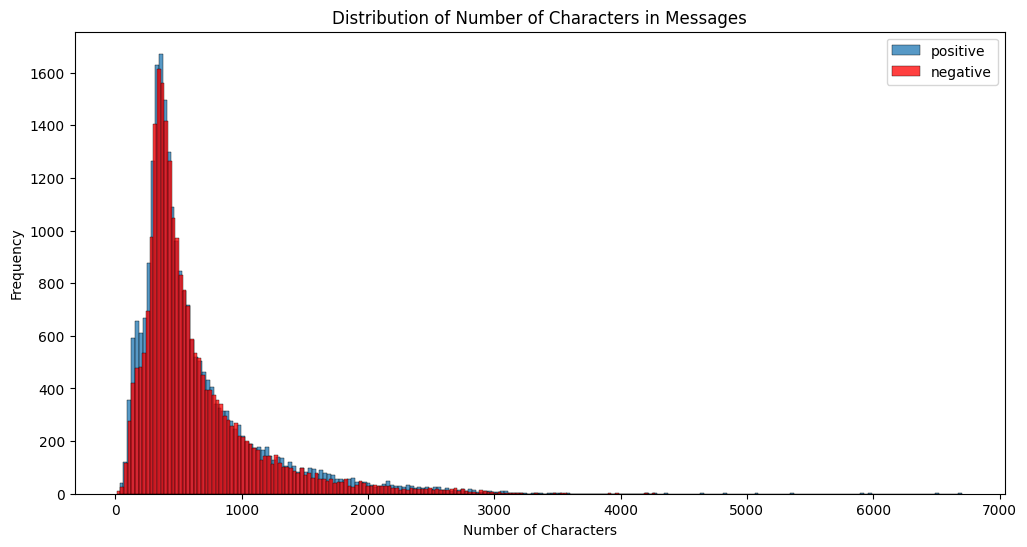

In [63]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df_reviews[df_reviews['sentiment'] == 'positive']['num_characters_cleaned_review'], label='positive')
sns.histplot(df_reviews[df_reviews['sentiment'] == 'negative']['num_characters_cleaned_review'], color='red', label='negative')  
plt.title('Distribution of Number of Characters in Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


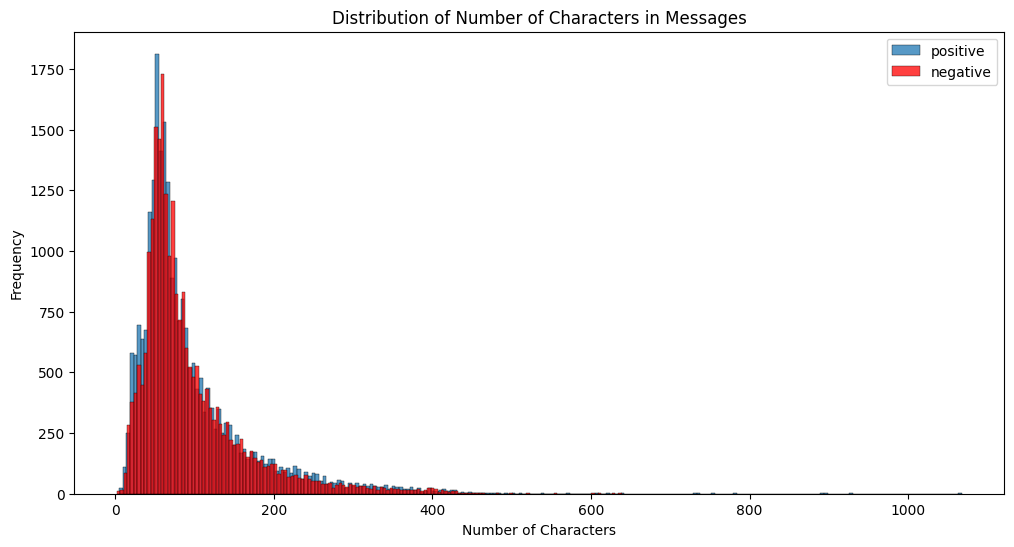

In [64]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df_reviews[df_reviews['sentiment'] == 'positive']['num_words_cleaned_review'], label='positive')
sns.histplot(df_reviews[df_reviews['sentiment'] == 'negative']['num_words_cleaned_review'], color='red', label='negative')  
plt.title('Distribution of Number of Characters in Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


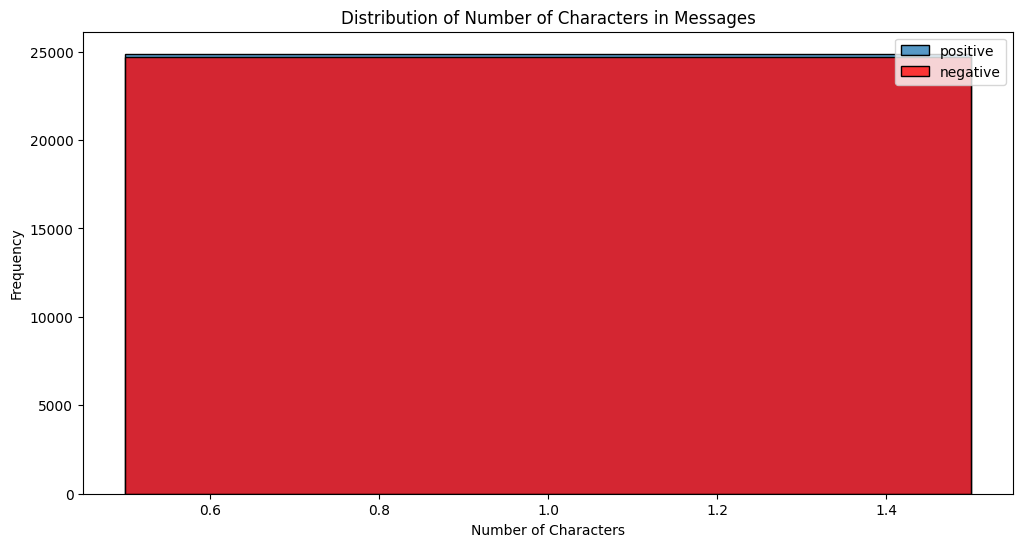

In [65]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df_reviews[df_reviews['sentiment'] == 'positive']['num_sentences_cleaned_review'], label='positive')
sns.histplot(df_reviews[df_reviews['sentiment'] == 'negative']['num_sentences_cleaned_review'], color='red', label='negative')  
plt.title('Distribution of Number of Characters in Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


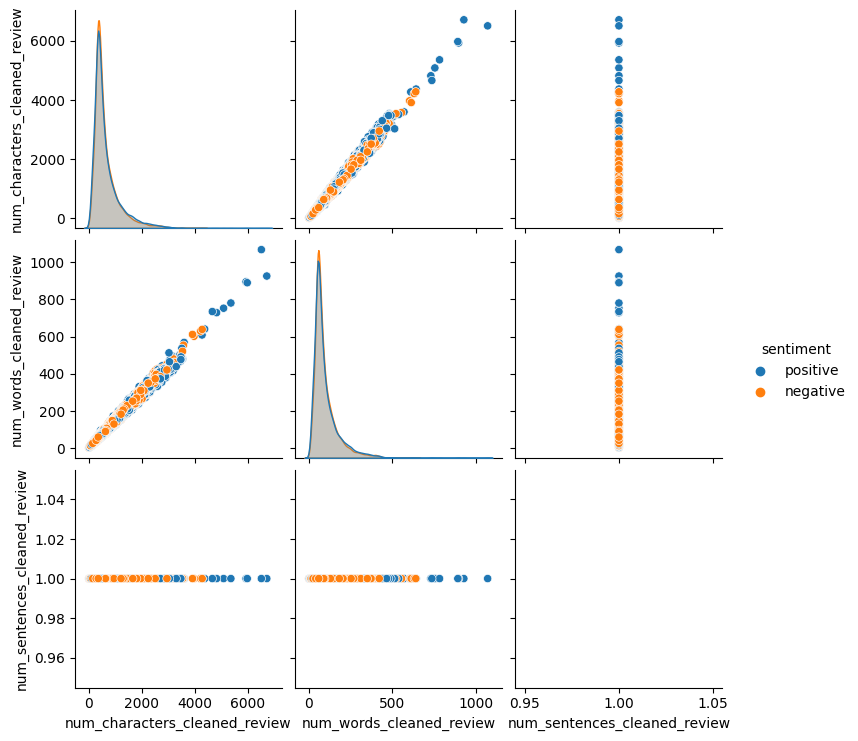

In [66]:
# relationship between the columns
sns.pairplot(df_reviews,hue='sentiment')

In [67]:
df_reviews.select_dtypes(include='number').corr()

,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
num_characters_cleaned_review,1.000000,0.996392,NaN
num_words_cleaned_review,0.996392,1.000000,NaN
num_sentences_cleaned_review,NaN,NaN,NaN


In [68]:
numeric_df = df_reviews.select_dtypes(include=['int', 'float'])
numeric_df

,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
0,858,130,1
1,518,70,1
2,497,74,1
3,326,51,1
4,660,101,1
...,...,...,...
49577,423,68,1
49578,284,42,1
49579,656,96,1
49580,636,90,1


C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

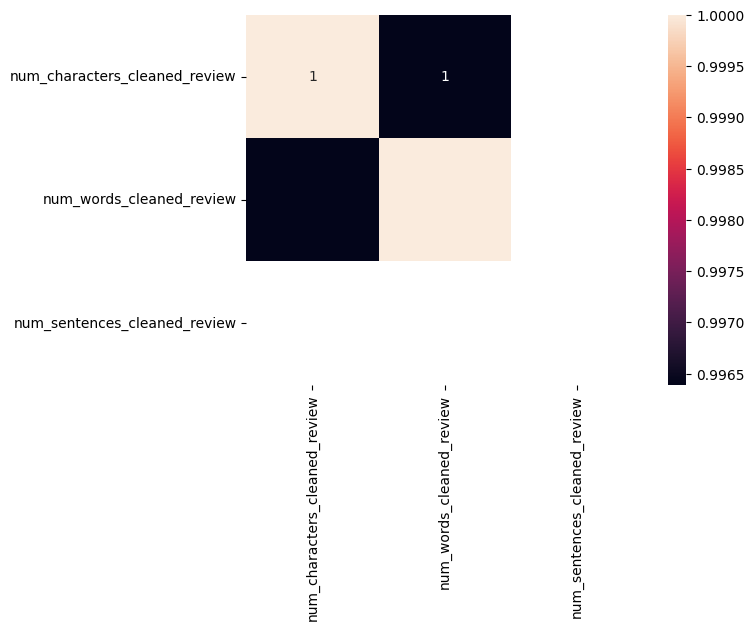

In [69]:
sns.heatmap(numeric_df.corr(),annot=True)

In [70]:
df_reviews.head()

,review,sentiment,cleaned_review_stemming,cleaned_review,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review watch episod hook right exactli fir...,one reviewer watching episode hooked right exa...,858,130,1
1,A wonderful little production. <br /><br />The...,positive,wonder littl product techniqu unassum fashion ...,wonderful little production technique unassumi...,518,70,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...,497,74,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...,326,51,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter love time money visual stun film watch ...,petter love time money visually stunning film ...,660,101,1


In [71]:
# WordCloud only show important words
from wordcloud import WordCloud 
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
positive_wc = wc.generate(df_reviews[df_reviews['sentiment'] == 'positive']['cleaned_review'].str.cat(sep=" "))

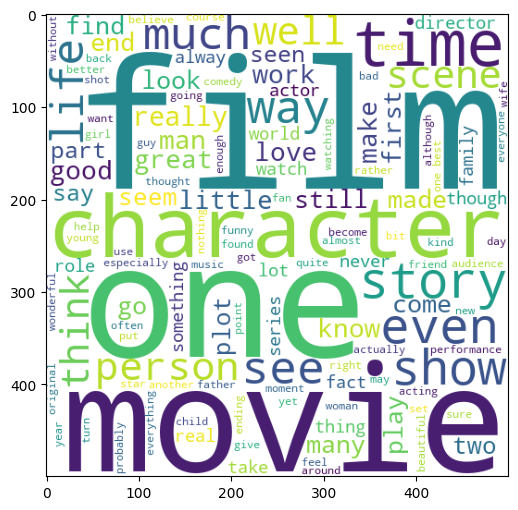

In [72]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

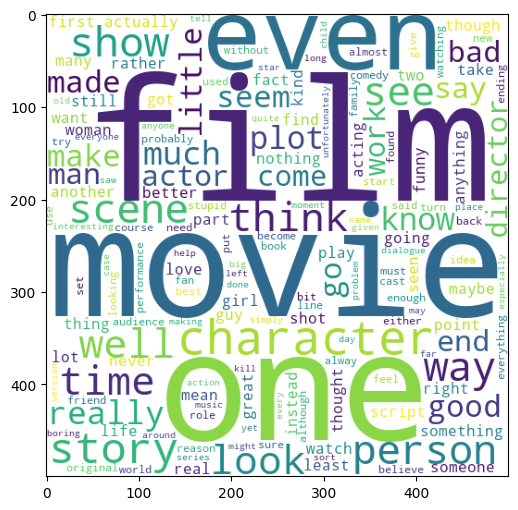

In [73]:
negative_wc = wc.generate(df_reviews[df_reviews['sentiment'] == 'negative']['cleaned_review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [74]:
positive_corpus = []
for msg in df_reviews[df_reviews['sentiment'] == 'positive']['cleaned_review'].tolist():
    for word in msg.split():
        positive_corpus.append(word)

In [75]:
len(positive_corpus)

2410214

In [76]:
from collections import Counter
pd.DataFrame(Counter(positive_corpus).most_common(30))

,0,1
0,film,47716
1,movie,42918
2,one,27205
3,like,17565
4,time,15128
5,good,14403
6,story,13628
7,character,13576
8,would,13105
9,great,12707


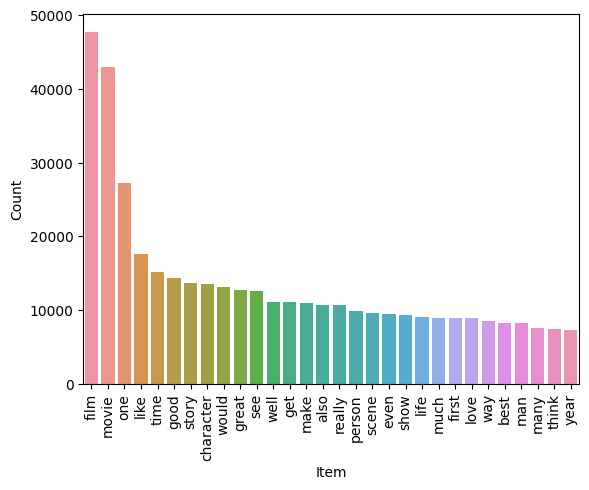

In [77]:
from collections import Counter
# Get the most common 30 items from the spam_corpus
most_common_items = Counter(positive_corpus).most_common(30)

# Create a DataFrame from the most common items
most_common_items = pd.DataFrame(most_common_items, columns=['Item', 'Count'])

# Plot the barplot
sns.barplot(data=most_common_items, x='Item', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [78]:
negative_corpus = []
for msg in df_reviews[df_reviews['sentiment'] == 'negative']['cleaned_review'].tolist():
    for word in msg.split():
        negative_corpus.append(word)

In [79]:
len(negative_corpus)

2366527

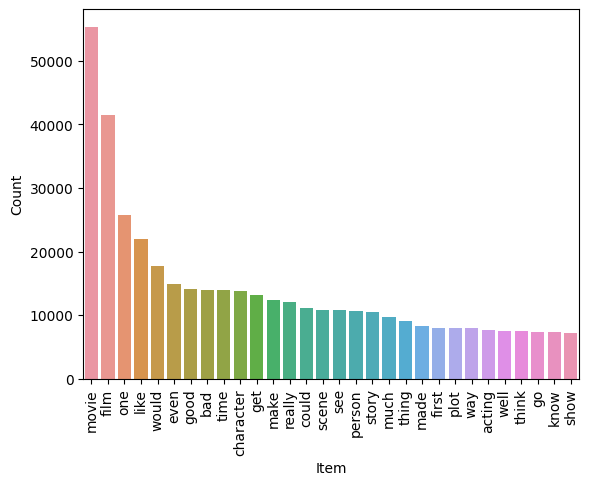

In [80]:
from collections import Counter
# Get the most common 30 items from the spam_corpus
most_common_items = Counter(negative_corpus).most_common(30)

# Create a DataFrame from the most common items
most_common_items = pd.DataFrame(most_common_items, columns=['Item', 'Count'])

# Plot the barplot
sns.barplot(data=most_common_items, x='Item', y='Count')
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [81]:
df_reviews.head()

,review,sentiment,cleaned_review_stemming,cleaned_review,num_characters_cleaned_review,num_words_cleaned_review,num_sentences_cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review watch episod hook right exactli fir...,one reviewer watching episode hooked right exa...,858,130,1
1,A wonderful little production. <br /><br />The...,positive,wonder littl product techniqu unassum fashion ...,wonderful little production technique unassumi...,518,70,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...,497,74,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...,326,51,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter love time money visual stun film watch ...,petter love time money visually stunning film ...,660,101,1


In [82]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df_reviews['cleaned_review']).toarray()

In [83]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [84]:
X.shape

(49582, 3000)

In [85]:
y = df_reviews['sentiment'].values

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [87]:
# Fit the Gaussian Naive Bayes model
gnb.fit(X_train, y_train)

# Predict labels on the test set
y_pred1 = gnb.predict(X_test)

# Convert binary labels to 'negative' and 'positive'
y_pred_labels1 = ['negative' if label == 0 else 'positive' for label in y_pred1]

# Calculate accuracy, confusion matrix, and precision score
accuracy = accuracy_score(y_test, y_pred_labels1)
conf_matrix = confusion_matrix(y_test, y_pred_labels1)
precision = precision_score(y_test, y_pred_labels1, pos_label='positive')

print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)

Accuracy Score: 0.5024705051931028
Confusion Matrix:
 [[   0 4934]
 [   0 4983]]
Precision Score: 0.5024705051931028


In [88]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
# Convert binary labels to 'negative' and 'positive'
y_pred_labels2 = ['negative' if label == 0 else 'positive' for label in y_pred2]
print(accuracy_score(y_test,y_pred_labels2))
print(confusion_matrix(y_test,y_pred_labels2))
print(precision_score(y_test,y_pred_labels2, pos_label='positive'))

0.5024705051931028
[[   0 4934]
 [   0 4983]]
0.5024705051931028


In [89]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
# Convert binary labels to 'negative' and 'positive'
y_pred_labels3 = ['negative' if label == 0 else 'positive' for label in y_pred3]
print(accuracy_score(y_test,y_pred_labels3))
print(confusion_matrix(y_test,y_pred_labels3))
print(precision_score(y_test,y_pred_labels3, pos_label='positive'))

0.5024705051931028
[[   0 4934]
 [   0 4983]]
0.5024705051931028


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [91]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [92]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [93]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='positive')
    
    return accuracy, precision

In [94]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8753655339316325, 0.8655609756097561)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8753655339316325
Precision -  0.8655609756097561
For  KN
Accuracy -  0.7313703741050721
Precision -  0.7039577836411609
For  NB
Accuracy -  0.8446102652011697
Precision -  0.839180134016555
For  DT
Accuracy -  0.6889180195623676
Precision -  0.6329131652661064
For  LR
Accuracy -  0.877483109811435
Precision -  0.8662519440124417
For  RF
Accuracy -  0.8369466572552183
Precision -  0.839041095890411
For  AdaBoost
Accuracy -  0.7971160633256025
Precision -  0.7737239727289479


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# # Create an instance of SVC
# svc_model = SVC()

# # Train the SVC model on the training data (X_train and y_train)
# svc_model.fit(X_train, y_train)

In [ ]:
# Take input text
input_text = input("Enter the text to predict: ")

# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform([input_text])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
predicted_label = svc_model.predict(input_text_transformed_dense)

# Print the predicted label
if predicted_label == 1:
    print("Predicted label: positive")
else:
    print("Predicted label: negative")

### Voting Classifier

In [ ]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
# voting.fit(X_train,y_train)

In [ ]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Take input text
input_text = input("Enter the text to predict: ")

# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform([input_text])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
predicted_label = voting.predict(input_text_transformed_dense)

# Print the predicted label
if predicted_label == 1:
    print("Predicted label: positive")
else:
    print("Predicted label: negative")

### Applying stacking

In [ ]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [ ]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))